In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import dateutil.parser
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [9]:
tweets_popularity_series = pd.read_csv('../../../data/twitter_popularity_time_series/companies_weekly_tweets_count_normalized.csv')

In [10]:
tweets_popularity_series['CreatedAt']

0       2011-01-09 00:00:00+00:00
1       2011-01-16 00:00:00+00:00
2       2011-01-23 00:00:00+00:00
3       2011-01-30 00:00:00+00:00
4       2011-02-06 00:00:00+00:00
                  ...            
3746    2021-03-07 00:00:00+00:00
3747    2021-03-14 00:00:00+00:00
3748    2021-03-21 00:00:00+00:00
3749    2021-03-28 00:00:00+00:00
3750    2021-04-04 00:00:00+00:00
Name: CreatedAt, Length: 3751, dtype: object

In [11]:
tweets_popularity_series.index = pd.to_datetime(tweets_popularity_series['CreatedAt'])

In [16]:
tweets_popularity_series

,CreatedAt,Count,Count Normalized,Company
CreatedAt,,,,
2011-01-09 00:00:00+00:00,2011-01-09 00:00:00+00:00,27,0.004538,Enphase Energy
2011-01-16 00:00:00+00:00,2011-01-16 00:00:00+00:00,21,0.003529,Enphase Energy
2011-01-23 00:00:00+00:00,2011-01-23 00:00:00+00:00,47,0.007899,Enphase Energy
2011-01-30 00:00:00+00:00,2011-01-30 00:00:00+00:00,21,0.003529,Enphase Energy
2011-02-06 00:00:00+00:00,2011-02-06 00:00:00+00:00,43,0.007227,Enphase Energy
...,...,...,...,...
2021-03-07 00:00:00+00:00,2021-03-07 00:00:00+00:00,29,0.004874,Meridian Energy
2021-03-14 00:00:00+00:00,2021-03-14 00:00:00+00:00,37,0.006218,Meridian Energy
2021-03-21 00:00:00+00:00,2021-03-21 00:00:00+00:00,18,0.003025,Meridian Energy


In [17]:
tweets_popularity_series.drop('CreatedAt',axis=1, inplace=True)

In [18]:
tweets_popularity_series

,Count,Count Normalized,Company
CreatedAt,,,
2011-01-09 00:00:00+00:00,27,0.004538,Enphase Energy
2011-01-16 00:00:00+00:00,21,0.003529,Enphase Energy
2011-01-23 00:00:00+00:00,47,0.007899,Enphase Energy
2011-01-30 00:00:00+00:00,21,0.003529,Enphase Energy
2011-02-06 00:00:00+00:00,43,0.007227,Enphase Energy
...,...,...,...
2021-03-07 00:00:00+00:00,29,0.004874,Meridian Energy
2021-03-14 00:00:00+00:00,37,0.006218,Meridian Energy
2021-03-21 00:00:00+00:00,18,0.003025,Meridian Energy


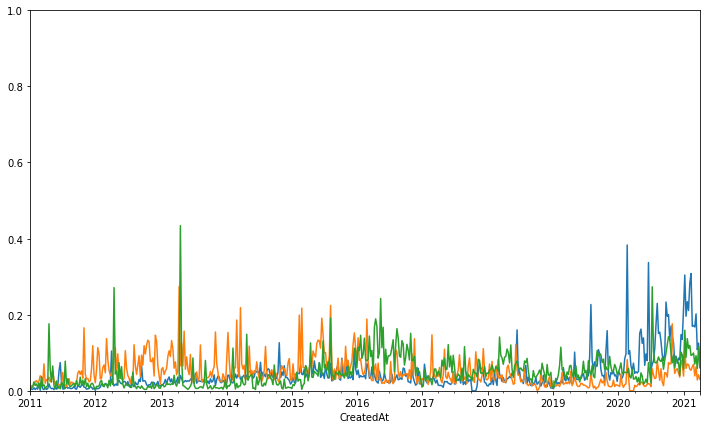

In [29]:
tweets_popularity_series[(tweets_popularity_series['Company'] == 'Enphase Energy')]['Count Normalized'].plot(figsize=(12,7),ylim=[0,1]);
tweets_popularity_series[(tweets_popularity_series['Company'] == 'First Solar')]['Count Normalized'].plot(figsize=(12,7),ylim=[0,1]);
tweets_popularity_series[(tweets_popularity_series['Company'] == 'Sunrun')]['Count Normalized'].plot(figsize=(12,7),ylim=[0,1]);

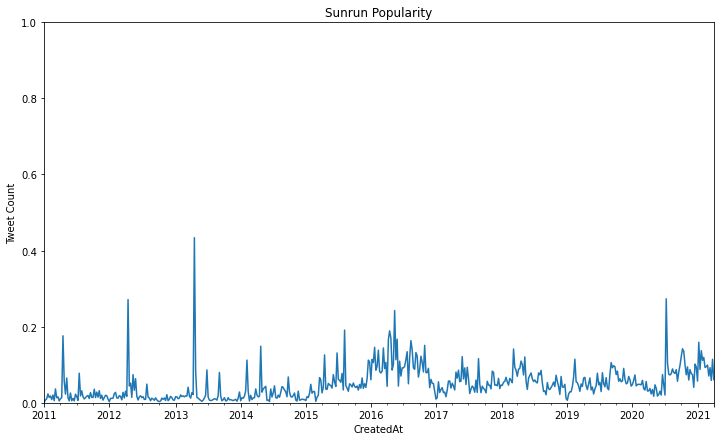

In [148]:
tweets_popularity_series[(tweets_popularity_series['Company'] == 'Sunrun')]['Count Normalized'].plot(figsize=(12,7),ylim=[0,1], title='Sunrun Popularity',ylabel='Tweet Count');

# Stock Prices

In [41]:
stock_prices = pd.read_csv('../../../data/team/Stock Price Time Series/stock_prices_time_series_converged.csv')

In [42]:
stock_prices.drop(['Unnamed: 9','Unnamed: 10','mean delta','-0.073169045'], axis=1,inplace=True)

In [43]:
stock_prices.index = pd.to_datetime(stock_prices['timestamp'])

In [45]:
stock_prices.drop('timestamp', axis=1, inplace=True)

In [50]:
stock_prices

,Ticker,open,high,low,close,volume,delta,deltaNorm
timestamp,,,,,,,,
2021-04-23,SPWR,28.07,29.420,27.51,29.01,3461071,0.94,0.243455
2021-04-22,SPWR,27.92,28.980,27.40,27.66,4502055,-0.26,-0.044894
2021-04-21,SPWR,25.60,27.410,25.02,27.38,2589691,1.78,0.445300
2021-04-20,SPWR,26.50,26.898,25.17,25.93,3248555,-0.57,-0.119384
2021-04-19,SPWR,27.45,28.220,26.07,26.54,3803556,-0.91,-0.201083
...,...,...,...,...,...,...,...,...
2007-07-19,VWDRY,24.00,24.000,24.00,24.00,3763,0.00,0.017582
2007-07-18,VWDRY,23.25,23.450,23.25,23.25,8735,0.00,0.017582
2007-07-17,VWDRY,23.40,23.400,23.40,23.40,4464,0.00,0.017582


In [48]:
stock_prices_sunpower = stock_prices[stock_prices['Ticker']=='SPWR']

In [49]:
stock_prices_sunpower

,Ticker,open,high,low,close,volume,delta,deltaNorm
timestamp,,,,,,,,
2021-04-23,SPWR,28.07,29.420,27.51,29.01,3461071,0.94,0.243455
2021-04-22,SPWR,27.92,28.980,27.40,27.66,4502055,-0.26,-0.044894
2021-04-21,SPWR,25.60,27.410,25.02,27.38,2589691,1.78,0.445300
2021-04-20,SPWR,26.50,26.898,25.17,25.93,3248555,-0.57,-0.119384
2021-04-19,SPWR,27.45,28.220,26.07,26.54,3803556,-0.91,-0.201083
...,...,...,...,...,...,...,...,...
2005-11-23,SPWR,25.15,25.580,25.02,25.14,510000,-0.01,0.015179
2005-11-22,SPWR,26.73,26.730,25.03,25.10,375900,-1.63,-0.374093
2005-11-21,SPWR,27.10,27.950,25.75,26.60,571700,-0.50,-0.102564


# Join Popularity and Stock Prices

In [94]:
stock_prices.index

DatetimeIndex(['2021-04-23', '2021-04-22', '2021-04-21', '2021-04-20',
               '2021-04-19', '2021-04-16', '2021-04-15', '2021-04-14',
               '2021-04-13', '2021-04-12',
               ...
               '2007-07-26', '2007-07-25', '2007-07-24', '2007-07-23',
               '2007-07-20', '2007-07-19', '2007-07-18', '2007-07-17',
               '2007-07-16', '2007-07-13'],
              dtype='datetime64[ns]', name='timestamp', length=32005, freq=None)

In [95]:
tweets_popularity_series['Company'].unique()

array(['Enphase Energy', 'First Solar', 'Siemens Gamesa', 'Plug Power',
       'Sunrun', 'Sunpower', 'Meridian Energy'], dtype=object)

In [96]:
tweets_popularity_series_sunpower = tweets_popularity_series[tweets_popularity_series['Company'] == 'Sunpower']

In [97]:
tweets_popularity_series_sunpower

,Count,Count Normalized,Company
CreatedAt,,,
2011-01-02 00:00:00+00:00,15,0.002521,Sunpower
2011-01-09 00:00:00+00:00,46,0.007731,Sunpower
2011-01-16 00:00:00+00:00,39,0.006555,Sunpower
2011-01-23 00:00:00+00:00,39,0.006555,Sunpower
2011-01-30 00:00:00+00:00,53,0.008908,Sunpower
...,...,...,...
2021-03-07 00:00:00+00:00,265,0.044538,Sunpower
2021-03-14 00:00:00+00:00,238,0.040000,Sunpower
2021-03-21 00:00:00+00:00,223,0.037479,Sunpower


In [98]:
def count_weekly_tweets(df):
    weekly_tweets = pd.DataFrame(df.resample('W')['close'].mean())
    weekly_tweets.rename(columns = {"":"Count"}, inplace=True)
    weekly_tweets.reset_index(inplace=True)
    return weekly_tweets


In [99]:
stock_prices_sunpower

,Ticker,open,high,low,close,volume,delta,deltaNorm
timestamp,,,,,,,,
2021-04-23 00:00:00+00:00,SPWR,28.07,29.420,27.51,29.01,3461071,0.94,0.243455
2021-04-22 00:00:00+00:00,SPWR,27.92,28.980,27.40,27.66,4502055,-0.26,-0.044894
2021-04-21 00:00:00+00:00,SPWR,25.60,27.410,25.02,27.38,2589691,1.78,0.445300
2021-04-20 00:00:00+00:00,SPWR,26.50,26.898,25.17,25.93,3248555,-0.57,-0.119384
2021-04-19 00:00:00+00:00,SPWR,27.45,28.220,26.07,26.54,3803556,-0.91,-0.201083
...,...,...,...,...,...,...,...,...
2005-11-23 00:00:00+00:00,SPWR,25.15,25.580,25.02,25.14,510000,-0.01,0.015179
2005-11-22 00:00:00+00:00,SPWR,26.73,26.730,25.03,25.10,375900,-1.63,-0.374093
2005-11-21 00:00:00+00:00,SPWR,27.10,27.950,25.75,26.60,571700,-0.50,-0.102564


In [100]:
weekly_close_sunpower = pd.DataFrame(stock_prices_sunpower.resample('W')['close'].mean())

In [101]:
weekly_close_sunpower = weekly_close_sunpower['2011-01-02':'2021-04-04']

In [102]:
# stock_prices_sunpower_weekly = count_weekly_tweets(stock_prices_sunpower)

In [103]:
# weekly_close_sunpower['2011-01-02':]

In [104]:
weekly_close_sunpower

,close
timestamp,
2011-01-02 00:00:00+00:00,13.0620
2011-01-09 00:00:00+00:00,13.5235
2011-01-16 00:00:00+00:00,14.1360
2011-01-23 00:00:00+00:00,14.4275
2011-01-30 00:00:00+00:00,13.8740
...,...
2021-03-07 00:00:00+00:00,33.6480
2021-03-14 00:00:00+00:00,33.1720
2021-03-21 00:00:00+00:00,33.3540


In [105]:
# sunpower_data = pd.merge(stock_prices_sunpower, tweets_popularity_series_sunpower, left_index=True, right_index=True)

In [106]:
# sunpower = pd.concat([stock_prices_sunpower, tweets_popularity_series_sunpower], axis=1)

In [107]:
# stock_prices_sunpower.index = pd.to_datetime(stock_prices_sunpower.index).tz_localize('Etc/UCT')

In [108]:
# weekly_close_sunpower.index = pd.to_datetime(stock_prices_sunpower.index).tz_localize('Etc/UCT')

In [109]:
# tweets_popularity_series_sunpower.index = pd.to_datetime(tweets_popularity_series_sunpower.index).tz_localize('Etc/UCT')

In [110]:
# sunpower = pd.concat([weekly_close_sunpower_no_tz, tweets_popularity_series_sunpower], axis=1)

## Join popularity and Popularity

In [113]:
weekly_close_sunpower

,close
timestamp,
2011-01-02 00:00:00+00:00,13.0620
2011-01-09 00:00:00+00:00,13.5235
2011-01-16 00:00:00+00:00,14.1360
2011-01-23 00:00:00+00:00,14.4275
2011-01-30 00:00:00+00:00,13.8740
...,...
2021-03-07 00:00:00+00:00,33.6480
2021-03-14 00:00:00+00:00,33.1720
2021-03-21 00:00:00+00:00,33.3540


In [115]:
tweets_popularity_series_sunpower

,Count,Count Normalized,Company
CreatedAt,,,
2011-01-02 00:00:00+00:00,15,0.002521,Sunpower
2011-01-09 00:00:00+00:00,46,0.007731,Sunpower
2011-01-16 00:00:00+00:00,39,0.006555,Sunpower
2011-01-23 00:00:00+00:00,39,0.006555,Sunpower
2011-01-30 00:00:00+00:00,53,0.008908,Sunpower
...,...,...,...
2021-03-07 00:00:00+00:00,265,0.044538,Sunpower
2021-03-14 00:00:00+00:00,238,0.040000,Sunpower
2021-03-21 00:00:00+00:00,223,0.037479,Sunpower


In [116]:
weekly_close_sunpower.index = pd.to_datetime(weekly_close_sunpower.index).tz_localize('Etc/UCT')

TypeError: Already tz-aware, use tz_convert to convert.

In [117]:
tweets_popularity_series_sunpower.index = pd.to_datetime(tweets_popularity_series_sunpower.index).tz_localize('Etc/UCT')

TypeError: Already tz-aware, use tz_convert to convert.

In [118]:
sunpower = pd.concat([tweets_popularity_series_sunpower, weekly_close_sunpower], axis=1)

In [119]:
sunpower

,Count,Count Normalized,Company,close
2011-01-02 00:00:00+00:00,15,0.002521,Sunpower,13.0620
2011-01-09 00:00:00+00:00,46,0.007731,Sunpower,13.5235
2011-01-16 00:00:00+00:00,39,0.006555,Sunpower,14.1360
2011-01-23 00:00:00+00:00,39,0.006555,Sunpower,14.4275
2011-01-30 00:00:00+00:00,53,0.008908,Sunpower,13.8740
...,...,...,...,...
2021-03-07 00:00:00+00:00,265,0.044538,Sunpower,33.6480
2021-03-14 00:00:00+00:00,238,0.040000,Sunpower,33.1720
2021-03-21 00:00:00+00:00,223,0.037479,Sunpower,33.3540
2021-03-28 00:00:00+00:00,281,0.047227,Sunpower,32.3410


<AxesSubplot:>

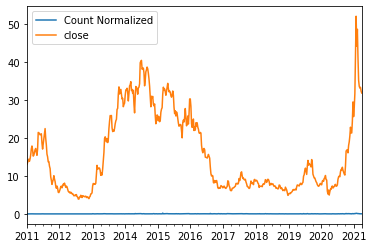

In [125]:
sunpower[['Count Normalized', 'close']].plot()

In [126]:
def normalize_close(df):
    max_count = df['close'].max()
    min_count = df['close'].min()
    df['Close Price Normalized'] = (df['close'] - min_count) / (max_count - min_count)
    return df

In [127]:
sunpower = normalize_close(sunpower)

In [128]:
sunpower

,Count,Count Normalized,Company,close,Close Price Normalized
2011-01-02 00:00:00+00:00,15,0.002521,Sunpower,13.0620,0.189956
2011-01-09 00:00:00+00:00,46,0.007731,Sunpower,13.5235,0.199533
2011-01-16 00:00:00+00:00,39,0.006555,Sunpower,14.1360,0.212243
2011-01-23 00:00:00+00:00,39,0.006555,Sunpower,14.4275,0.218292
2011-01-30 00:00:00+00:00,53,0.008908,Sunpower,13.8740,0.206806
...,...,...,...,...,...
2021-03-07 00:00:00+00:00,265,0.044538,Sunpower,33.6480,0.617140
2021-03-14 00:00:00+00:00,238,0.040000,Sunpower,33.1720,0.607263
2021-03-21 00:00:00+00:00,223,0.037479,Sunpower,33.3540,0.611040
2021-03-28 00:00:00+00:00,281,0.047227,Sunpower,32.3410,0.590019


<AxesSubplot:>

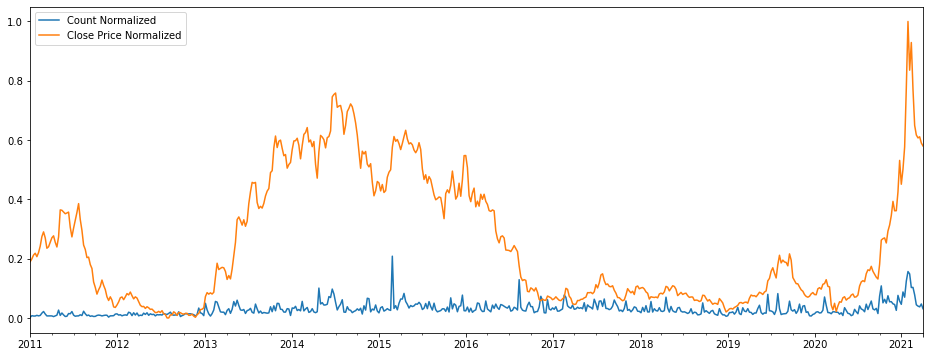

In [134]:
sunpower[['Count Normalized', 'Close Price Normalized']].plot(figsize = (16,6))

<AxesSubplot:>

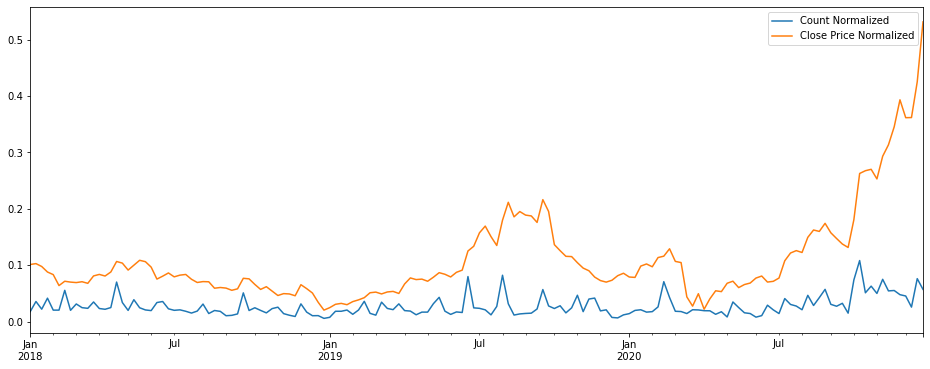

In [140]:
sunpower[['Count Normalized', 'Close Price Normalized']]['2018-01-01':'2021-01-01'].plot(figsize = (16,6))

# Plots for Presentation

In [160]:
sunpower.rename(columns={"Count":"Weekly Tweets Count", "Count Normalized":"Weekly Tweets Count Normalized"}, inplace=True)

In [162]:
sunpower

,Weekly Tweets Count,Weekly Tweets Count Normalized,Company,close,Close Price Normalized
2011-01-02 00:00:00+00:00,15,0.002521,Sunpower,13.0620,0.189956
2011-01-09 00:00:00+00:00,46,0.007731,Sunpower,13.5235,0.199533
2011-01-16 00:00:00+00:00,39,0.006555,Sunpower,14.1360,0.212243
2011-01-23 00:00:00+00:00,39,0.006555,Sunpower,14.4275,0.218292
2011-01-30 00:00:00+00:00,53,0.008908,Sunpower,13.8740,0.206806
...,...,...,...,...,...
2021-03-07 00:00:00+00:00,265,0.044538,Sunpower,33.6480,0.617140
2021-03-14 00:00:00+00:00,238,0.040000,Sunpower,33.1720,0.607263
2021-03-21 00:00:00+00:00,223,0.037479,Sunpower,33.3540,0.611040
2021-03-28 00:00:00+00:00,281,0.047227,Sunpower,32.3410,0.590019


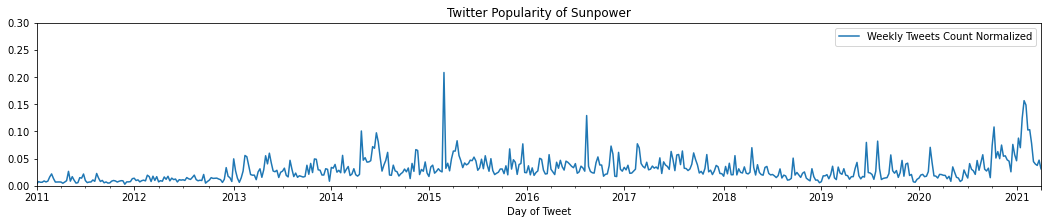

In [190]:
sunpower[['Weekly Tweets Count Normalized']].plot(figsize = (18,3), title="Twitter Popularity of Sunpower", xlabel="Day of Tweet", ylim = [0,0.3]);

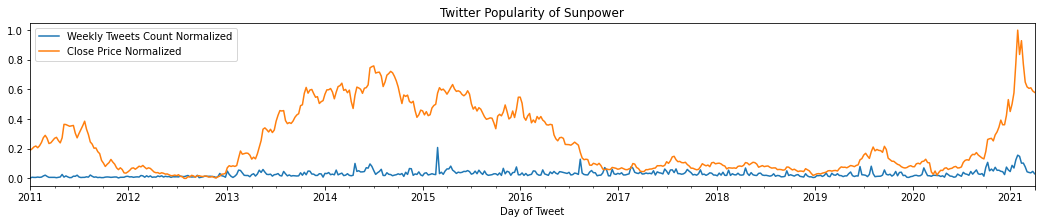

In [174]:
sunpower[['Weekly Tweets Count Normalized','Close Price Normalized']].plot(figsize = (18,3), title="Twitter Popularity of Sunpower", xlabel="Day of Tweet");

In [171]:
# sunpower[['Count Normalized', 'Close Price Normalized']].plot(figsize = (16,6));

<AxesSubplot:title={'center':'Twitter Popularity and Close Prices of Sunpower'}, xlabel='Day of Tweet'>

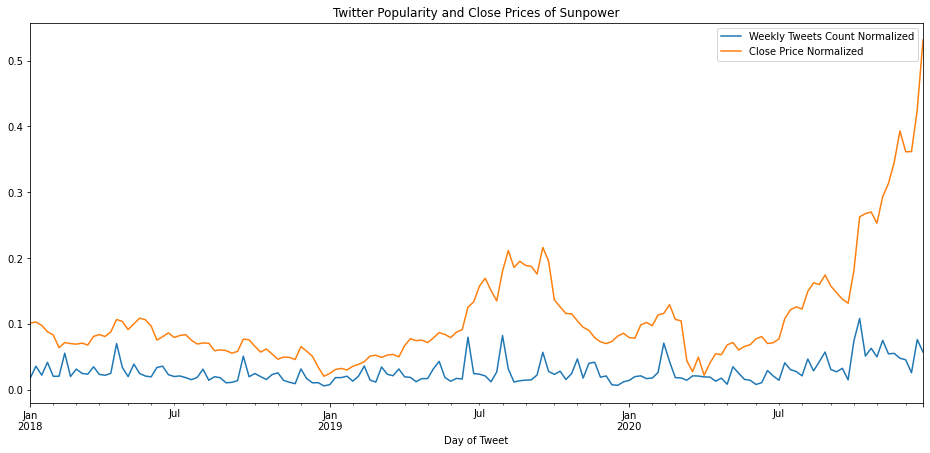

In [185]:
sunpower[['Weekly Tweets Count Normalized', 'Close Price Normalized']]['2018-01-01':'2021-01-01'].plot(figsize = (16,7), title="Twitter Popularity and Close Prices of Sunpower", xlabel="Day of Tweet")

In [ ]:
# sunpower[['Weekly Tweets Count Normalized']].plot(figsize = (18,3), title="Twitter Popularity of Sunpower", xlabel="Day of Tweet");

In [ ]:
.plot(figsize = (18,3), title="Twitter Popularity of Sunpower", xlabel="Day of Tweet");

In [ ]:
# tweets_popularity_series[(tweets_popularity_series['Company'] == 'Sunrun')]['Count Normalized'].plot(figsize=(12,7),ylim=[0,1], title='Sunrun Popularity',ylabel='Tweet Count');

## Popularity TO SHOW

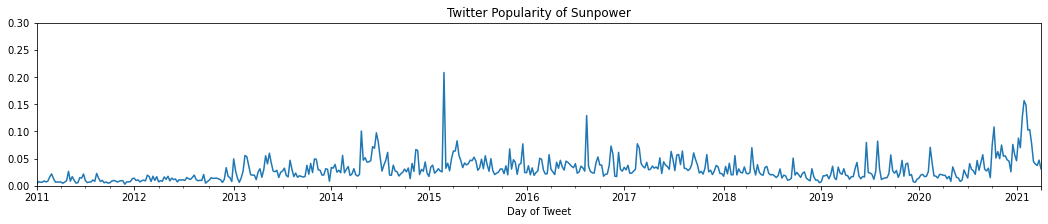

In [201]:
tweets_popularity_series[(tweets_popularity_series['Company'] == 'Sunpower')]['Count Normalized'].plot(figsize = (18,3), title="Twitter Popularity of Sunpower", xlabel="Day of Tweet", ylim = [0,0.3]);

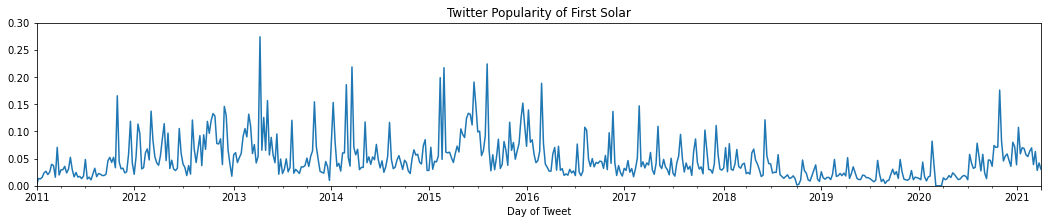

In [203]:
fig = tweets_popularity_series[(tweets_popularity_series['Company'] == 'First Solar')]['Count Normalized'].plot(figsize = (18,3), title="Twitter Popularity of First Solar", xlabel="Day of Tweet", ylim = [0,0.3]);